 # **Spaceship Titanic**

---
To predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision using Pyspark.


Link to the problem statement : [Spaceship Titanic](https://https://www.kaggle.com/competitions/spaceship-titanic/data)

The dataset has the following attributes

 1. PassengerId - A unique Id for each passenger. 
 2. HomePlanet - The planet the passenger departed from
 3. CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.
 4. Cabin - The cabin number where the passenger is staying. 
 5. Destination - The planet the passenger will be debarking to.
 6. Age - The age of the passenger.
 7.  VIP - Whether the passenger has paid for special VIP service during the voyage.
 8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
 9. Name - The first and last names of the passenger.
 10. Transported - Whether the passenger was transported to another dimension. This is the target, the column we are trying to predict.



## **Reading the dataset**

Before reading the dataset,all the important libraries are imported

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
#Reading the Train.csv dataset
df=pd.read_csv('/content/crashsurvival.csv')
# After reading the dataset, let’s check its top 5 rows using head() method to just see how the data looks.
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# Checking the shape of the dataset
df.shape

(8693, 14)

In [ ]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

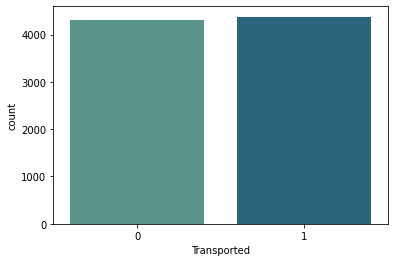

In [ ]:
#checking for the distribution of samples in the dataset
sns.countplot(x='Transported',data=df,palette='crest')

From the above plot,it is clear that samples are equally distributed and there is no need for upsampling or downsampling techniques

In [ ]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [ ]:
df['Cabin']=df['Cabin'].str[0]

## Handling Missing values 
Let us replace the missing values in every attribute

In [ ]:
mean_value=df['RoomService'].mean()
df['RoomService'].fillna(value=mean_value,inplace=True)

In [ ]:
mean_value=df['FoodCourt'].mean()
df['FoodCourt'].fillna(value=mean_value,inplace=True)

In [ ]:
mean_value=df['ShoppingMall'].mean()
df['ShoppingMall'].fillna(value=mean_value,inplace=True)

In [ ]:
mean_value=df['Spa'].mean()
df['Spa'].fillna(value=mean_value,inplace=True)

In [ ]:
mean_value=df['VRDeck'].mean()
df['VRDeck'].fillna(value=mean_value,inplace=True)

In [ ]:
mead_value=df['Age'].median()
df['Age'].fillna(value=mead_value,inplace=True)

In [ ]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [ ]:
df.drop('Name', inplace=True, axis=1)  #dropping name as it is not relavant to the prediction

In [ ]:
df=df.fillna(df.mode().iloc[0])

In [ ]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [ ]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()
 

df['HomePlanet']= label_encoder.fit_transform(df['HomePlanet'])

In [ ]:

df['CryoSleep']= label_encoder.fit_transform(df['CryoSleep'])

In [ ]:
df['Destination']= label_encoder.fit_transform(df['Destination'])

In [ ]:
df['VIP']= label_encoder.fit_transform(df['VIP'])

In [ ]:
df['Cabin']= label_encoder.fit_transform(df['Cabin'])

In [ ]:
df['Transported']= label_encoder.fit_transform(df['Transported'])

In [ ]:
df.dtypes

PassengerId      object
HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
dtype: object

In [ ]:
df['Transported'] = df['Transported'].astype('category')


In [ ]:
df.to_csv('updated1.csv',index=False)  #transferring the changes made in the dataframe to a new csv file

## **Building Model using pyspark**



1.   Logistics Regression
2.   DecisionTree Classifier
3.   RandomForest Classifier
4.   Gradient Boosting

In [ ]:
pip install pyspark   #installing pyspark

In [ ]:
import pyspark
from pyspark import SparkConf, SparkContext, SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf # @udf("integer") def myfunc(x,y): return x - y
from pyspark.sql import functions as F # stddev format_number date_format, dayofyear, when
from pyspark.sql.types import StructField, StringType, IntegerType, StructType

print([(x.__name__,x.__version__) for x in [np, pd, pyspark]])

spark = pyspark.sql.SparkSession.builder.appName('crash_survival_prediction').getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
sc.setLogLevel("INFO")

[('numpy', '1.21.6'), ('pandas', '1.3.5'), ('pyspark', '3.2.1')]


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
df1 = spark.read.csv('/content/updated1.csv',header=True,inferSchema=True)
print(df1.count())
df1.show()

8693
+-----------+----------+---------+-----+-----------+----+---+-----------+---------+------------------+------+-----------------+-----------+
|PassengerId|HomePlanet|CryoSleep|Cabin|Destination| Age|VIP|RoomService|FoodCourt|      ShoppingMall|   Spa|           VRDeck|Transported|
+-----------+----------+---------+-----+-----------+----+---+-----------+---------+------------------+------+-----------------+-----------+
|    0001_01|         1|        0|    1|          2|39.0|  0|        0.0|      0.0|               0.0|   0.0|              0.0|          0|
|    0002_01|         0|        0|    5|          2|24.0|  0|      109.0|      9.0|              25.0| 549.0|             44.0|          1|
|    0003_01|         1|        0|    0|          2|58.0|  1|       43.0|   3576.0|               0.0|6715.0|             49.0|          0|
|    0003_02|         1|        0|    0|          2|33.0|  0|        0.0|   1283.0|             371.0|3329.0|            193.0|          0|
|    0004_01|  

In [ ]:
df1.printSchema()        #printing the schema 

root
 |-- PassengerId: string (nullable = true)
 |-- HomePlanet: integer (nullable = true)
 |-- CryoSleep: integer (nullable = true)
 |-- Cabin: integer (nullable = true)
 |-- Destination: integer (nullable = true)
 |-- Age: double (nullable = true)
 |-- VIP: integer (nullable = true)
 |-- RoomService: double (nullable = true)
 |-- FoodCourt: double (nullable = true)
 |-- ShoppingMall: double (nullable = true)
 |-- Spa: double (nullable = true)
 |-- VRDeck: double (nullable = true)
 |-- Transported: integer (nullable = true)



In [ ]:
df1.columns

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported']

In [ ]:
from pyspark.sql.functions import isnull, when, count, col

df1.select([count(when(isnull(c), c)).alias(c) for c in df1.columns]).show()

+-----------+----------+---------+-----+-----------+---+---+-----------+---------+------------+---+------+-----------+
|PassengerId|HomePlanet|CryoSleep|Cabin|Destination|Age|VIP|RoomService|FoodCourt|ShoppingMall|Spa|VRDeck|Transported|
+-----------+----------+---------+-----+-----------+---+---+-----------+---------+------------+---+------+-----------+
|          0|         0|        0|    0|          0|  0|  0|          0|        0|           0|  0|     0|          0|
+-----------+----------+---------+-----+-----------+---+---+-----------+---------+------------+---+------+-----------+



In [ ]:
df1.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
PassengerId,8693,None,None,0001_01,9280_02
HomePlanet,8693,0.6498331991257333,0.7951831125486745,0,2
CryoSleep,8693,0.3493615552743587,0.476795774290224,0,1
Cabin,8693,4.321292994363281,1.7608263715284282,0,7
Destination,8693,1.4943057632577936,0.814966433098883,0,2
Age,8693,28.790291038766824,14.341404200150102,0.0,79.0
VIP,8693,0.02289198205452663,0.14956775256042576,0,1
RoomService,8693,224.6876174812033,659.7393636011287,0.0,14327.0
FoodCourt,8693,458.07720329024545,1594.4349779842014,0.0,29813.0


In [ ]:
titanic_df = df1.drop("PassengerId","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck") #dropping all the unnecessary columns

In [ ]:
titanic_df.show()

+----------+---------+-----+-----------+----+---+-----------+
|HomePlanet|CryoSleep|Cabin|Destination| Age|VIP|Transported|
+----------+---------+-----+-----------+----+---+-----------+
|         1|        0|    1|          2|39.0|  0|          0|
|         0|        0|    5|          2|24.0|  0|          1|
|         1|        0|    0|          2|58.0|  1|          0|
|         1|        0|    0|          2|33.0|  0|          0|
|         0|        0|    5|          2|16.0|  0|          1|
|         0|        0|    5|          1|44.0|  0|          1|
|         0|        0|    5|          2|26.0|  0|          1|
|         0|        1|    6|          2|28.0|  0|          1|
|         0|        0|    5|          2|35.0|  0|          1|
|         1|        1|    1|          0|14.0|  0|          1|
|         1|        1|    1|          2|34.0|  0|          1|
|         1|        0|    1|          0|45.0|  0|          1|
|         2|        0|    5|          2|32.0|  0|          1|
|       

In [ ]:
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
feature = VectorAssembler(inputCols=['HomePlanet','Cabin','CryoSleep','Destination','Age','VIP'],outputCol="features") #taking all the necessary columns and putting into the same vector
feature_vector= feature.transform(titanic_df)

In [ ]:
feature_vector.show()

+----------+---------+-----+-----------+----+---+-----------+--------------------+
|HomePlanet|CryoSleep|Cabin|Destination| Age|VIP|Transported|            features|
+----------+---------+-----+-----------+----+---+-----------+--------------------+
|         1|        0|    1|          2|39.0|  0|          0|[1.0,1.0,0.0,2.0,...|
|         0|        0|    5|          2|24.0|  0|          1|[0.0,5.0,0.0,2.0,...|
|         1|        0|    0|          2|58.0|  1|          0|[1.0,0.0,0.0,2.0,...|
|         1|        0|    0|          2|33.0|  0|          0|[1.0,0.0,0.0,2.0,...|
|         0|        0|    5|          2|16.0|  0|          1|[0.0,5.0,0.0,2.0,...|
|         0|        0|    5|          1|44.0|  0|          1|[0.0,5.0,0.0,1.0,...|
|         0|        0|    5|          2|26.0|  0|          1|[0.0,5.0,0.0,2.0,...|
|         0|        1|    6|          2|28.0|  0|          1|[0.0,6.0,1.0,2.0,...|
|         0|        0|    5|          2|35.0|  0|          1|[0.0,5.0,0.0,2.0,...|
|   

In [ ]:
titanic_df.columns

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'Transported']

##  **1. LogisticRegression**

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline


In [ ]:
lr = LogisticRegression(featuresCol='features',labelCol='Transported')

In [ ]:
pipeline = Pipeline(stages=[feature, lr]) #building pipeline 

In [ ]:
(trainingData, testData) = titanic_df.randomSplit([0.7, 0.3],seed = 9)

In [ ]:
trainingData.tail(5)

[Row(HomePlanet=2, CryoSleep=1, Cabin=5, Destination=2, Age=70.0, VIP=0, Transported=1),
 Row(HomePlanet=2, CryoSleep=1, Cabin=5, Destination=2, Age=70.0, VIP=0, Transported=1),
 Row(HomePlanet=2, CryoSleep=1, Cabin=5, Destination=2, Age=72.0, VIP=0, Transported=1),
 Row(HomePlanet=2, CryoSleep=1, Cabin=5, Destination=2, Age=75.0, VIP=0, Transported=1),
 Row(HomePlanet=2, CryoSleep=1, Cabin=5, Destination=2, Age=75.0, VIP=0, Transported=1)]

In [ ]:
lr_model = pipeline.fit(trainingData)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [ ]:
lr_predicition = lr_model.transform(testData)
lr_predicition.select("prediction", "Transported", "features").show()

+----------+-----------+--------------------+
|prediction|Transported|            features|
+----------+-----------+--------------------+
|       1.0|          0|      (6,[4],[38.0])|
|       0.0|          0|[0.0,1.0,0.0,2.0,...|
|       0.0|          0|[0.0,1.0,0.0,2.0,...|
|       1.0|          1|(6,[1,4],[2.0,18.0])|
|       0.0|          1|[0.0,2.0,0.0,2.0,...|
|       0.0|          1|[0.0,2.0,0.0,2.0,...|
|       0.0|          0|[0.0,3.0,0.0,2.0,...|
|       0.0|          0|(6,[1,4],[4.0,14.0])|
|       0.0|          1|(6,[1,4],[4.0,14.0])|
|       0.0|          1|(6,[1,4],[4.0,17.0])|
|       0.0|          1|(6,[1,4],[4.0,18.0])|
|       0.0|          1|(6,[1,4],[4.0,19.0])|
|       0.0|          1|(6,[1,4],[4.0,22.0])|
|       0.0|          1|(6,[1,4],[4.0,22.0])|
|       0.0|          1|(6,[1,4],[4.0,24.0])|
|       0.0|          0|(6,[1,4],[4.0,25.0])|
|       0.0|          1|(6,[1,4],[4.0,25.0])|
|       0.0|          1|(6,[1,4],[4.0,26.0])|
|       0.0|          1|(6,[1,4],[

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="Transported", predictionCol="prediction", metricName="accuracy")

In [ ]:
auc = evaluator.evaluate(lr_predicition)
auc

0.7247104247104247

In [ ]:
lr_accuracy = evaluator.evaluate(lr_predicition)
print("Accuracy of LogisticRegression is = %g"% (lr_accuracy))
print("Test Error of LogisticRegression = %g " % (1.0 - lr_accuracy))

Accuracy of LogisticRegression is = 0.72471
Test Error of LogisticRegression = 0.27529 


## **2. DecisionTree classifier**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="Transported", featuresCol="features")


In [ ]:
pipeline2 = Pipeline(stages=[feature, dt])

In [ ]:
dt_model = pipeline2.fit(trainingData)

In [ ]:
dt_predictions = dt_model.transform(testData)
dt_predictions.select("prediction", "Transported", "features").show()

+----------+-----------+--------------------+
|prediction|Transported|            features|
+----------+-----------+--------------------+
|       0.0|          0|      (6,[4],[38.0])|
|       0.0|          0|[0.0,1.0,0.0,2.0,...|
|       0.0|          0|[0.0,1.0,0.0,2.0,...|
|       0.0|          1|(6,[1,4],[2.0,18.0])|
|       0.0|          1|[0.0,2.0,0.0,2.0,...|
|       0.0|          1|[0.0,2.0,0.0,2.0,...|
|       0.0|          0|[0.0,3.0,0.0,2.0,...|
|       0.0|          0|(6,[1,4],[4.0,14.0])|
|       0.0|          1|(6,[1,4],[4.0,14.0])|
|       0.0|          1|(6,[1,4],[4.0,17.0])|
|       0.0|          1|(6,[1,4],[4.0,18.0])|
|       0.0|          1|(6,[1,4],[4.0,19.0])|
|       0.0|          1|(6,[1,4],[4.0,22.0])|
|       0.0|          1|(6,[1,4],[4.0,22.0])|
|       0.0|          1|(6,[1,4],[4.0,24.0])|
|       0.0|          0|(6,[1,4],[4.0,25.0])|
|       0.0|          1|(6,[1,4],[4.0,25.0])|
|       0.0|          1|(6,[1,4],[4.0,26.0])|
|       0.0|          1|(6,[1,4],[

In [ ]:
dt_accuracy = evaluator.evaluate(dt_predictions)
print("Accuracy of DecisionTreeClassifier is = %g"% (dt_accuracy))
print("Test Error of DecisionTreeClassifier = %g " % (1.0 - dt_accuracy))

Accuracy of DecisionTreeClassifier is = 0.746718
Test Error of DecisionTreeClassifier = 0.253282 


## **3.Random Forest classifier**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="Transported", featuresCol="features",maxDepth=7)

pipeline3 = Pipeline(stages=[feature, rf])
rf_model = pipeline3.fit(trainingData)



In [ ]:
rf_predictions = rf_model.transform(testData)
rf_predictions.select("prediction", "Transported", "features").show()

+----------+-----------+--------------------+
|prediction|Transported|            features|
+----------+-----------+--------------------+
|       0.0|          0|      (6,[4],[38.0])|
|       0.0|          0|[0.0,1.0,0.0,2.0,...|
|       0.0|          0|[0.0,1.0,0.0,2.0,...|
|       1.0|          1|(6,[1,4],[2.0,18.0])|
|       0.0|          1|[0.0,2.0,0.0,2.0,...|
|       0.0|          1|[0.0,2.0,0.0,2.0,...|
|       0.0|          0|[0.0,3.0,0.0,2.0,...|
|       0.0|          0|(6,[1,4],[4.0,14.0])|
|       0.0|          1|(6,[1,4],[4.0,14.0])|
|       0.0|          1|(6,[1,4],[4.0,17.0])|
|       0.0|          1|(6,[1,4],[4.0,18.0])|
|       0.0|          1|(6,[1,4],[4.0,19.0])|
|       0.0|          1|(6,[1,4],[4.0,22.0])|
|       0.0|          1|(6,[1,4],[4.0,22.0])|
|       0.0|          1|(6,[1,4],[4.0,24.0])|
|       0.0|          0|(6,[1,4],[4.0,25.0])|
|       0.0|          1|(6,[1,4],[4.0,25.0])|
|       0.0|          1|(6,[1,4],[4.0,26.0])|
|       0.0|          1|(6,[1,4],[

In [ ]:
rf_accuracy = evaluator.evaluate(rf_predictions)
print("Accuracy of RandomForestClassifier is = %g"% (rf_accuracy))
print("Test Error of RandomForestClassifier  = %g " % (1.0 - rf_accuracy))

Accuracy of RandomForestClassifier is = 0.747104
Test Error of RandomForestClassifier  = 0.252896 


## **4. Gradient Boostclassifier**

In [ ]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol="Transported", featuresCol="features",maxIter=10)
pipeline4 = Pipeline(stages=[feature, gbt])


In [ ]:
gbt_model = pipeline4.fit(trainingData)
gbt_prediction = gbt_model.transform(testData)
gbt_prediction.select("prediction", "Transported", "features").show()

+----------+-----------+--------------------+
|prediction|Transported|            features|
+----------+-----------+--------------------+
|       1.0|          0|      (6,[4],[38.0])|
|       0.0|          0|[0.0,1.0,0.0,2.0,...|
|       0.0|          0|[0.0,1.0,0.0,2.0,...|
|       1.0|          1|(6,[1,4],[2.0,18.0])|
|       0.0|          1|[0.0,2.0,0.0,2.0,...|
|       0.0|          1|[0.0,2.0,0.0,2.0,...|
|       0.0|          0|[0.0,3.0,0.0,2.0,...|
|       0.0|          0|(6,[1,4],[4.0,14.0])|
|       0.0|          1|(6,[1,4],[4.0,14.0])|
|       0.0|          1|(6,[1,4],[4.0,17.0])|
|       0.0|          1|(6,[1,4],[4.0,18.0])|
|       0.0|          1|(6,[1,4],[4.0,19.0])|
|       0.0|          1|(6,[1,4],[4.0,22.0])|
|       0.0|          1|(6,[1,4],[4.0,22.0])|
|       0.0|          1|(6,[1,4],[4.0,24.0])|
|       0.0|          0|(6,[1,4],[4.0,25.0])|
|       0.0|          1|(6,[1,4],[4.0,25.0])|
|       0.0|          1|(6,[1,4],[4.0,26.0])|
|       0.0|          1|(6,[1,4],[

In [ ]:

gbt_accuracy = evaluator.evaluate(gbt_prediction)
print("Accuracy of Gradient-boosted tree classifier is = %g"% (gbt_accuracy))
print("Test Error of Gradient-boosted tree classifier %g"% (1.0 - gbt_accuracy))

Accuracy of Gradient-boosted tree classifie is = 0.72471
Test Error of Gradient-boosted tree classifie 0.27529
